# Resolución Desafío - Giuliana Ruffa

Se pide diseñar un filtro pasabajo que satisfaga la siguiente plantilla:

    • ωp=500Hz
    • ωs=1500Hz
    • αmax=1dB
    • αmin=18dB


#### a) Determine si el siguiente diseño puede realizarse con una sola sección de segundo orden cuya respuesta de módulo es de **máxima planicidad**.

Para determinar si el siguiente diseño puede realizarse con una sola sección de segundo orden con una aproximación del tipo *máxima planicidad* debemos primero calcular el orden que requeriría el filtro para cumplir con dicha plantilla.

Para determinar esto, primero que nada establecemos como norma a *Ωp=500Hz* y así redefinimos *ωp=1* y *ωs=3Hz*.

Luego, despejamos el valor de *ϵ* para así determinar qué *orden n* requeriría nuestro filtro para cumplir con las condiciones de diseño. 

Desde $ϵ^2 = {10^{{αmax} /{10}}}-1$

In [23]:
amax = 1

ϵϵ = 10 ** (amax/10) - 1

ϵϵ = round(ϵϵ, 4)

ϵϵ

0.2589

Y a partir de esto, iteramos desde la ecuacion $αmin = {10 log ({{1} + {{ϵ^2}*{ωs^{{2n}}}}})}$ hasta obtener a cierto valor *n* una atenuación mayor o igual a *αmin*. 
Observamos que esto se da cuando **n = 3**:

In [6]:
import math

n = 3
ws = 3

atenuacion_minMP = 10 * math.log10 (1 + (ϵϵ * ws ** (2*n)))

atenuacion_minMP = round (atenuacion_minMP, 4)

atenuacion_minMP

22.7815

Por ende, determinamos que este filtro no se puede implementar con una sola sección de segundo orden ( *n=2* ), ya que para realizarlo se necesita además de esa sección, otra de primer orden.

#### b) Si el mismo diseño se planteara mediante una aproximación **Chebyshev**, se pide:

   • la función transferencia normalizada
    
   • las respuestas de módulo, fase y la localización de polos y ceros

Procedemos de la misma manera y despejamos el valor de ϵ para así determinar qué orden n requeriría nuestro filtro para cumplir con las condiciones de diseño.

Desde  $ϵ^2=10^{α𝑚𝑎𝑥/10}−1$, obtenemos que: $ϵ^2=0.2589$, como ya fue visto.
 

Y a partir de esto, iteramos desde la ecuacion del $αmin = {10 log ({{1} + {{ϵ^2}*{cosh^{2}({{n*cos^{-1}(ws)}})}}})}$ hasta obtener a cierto valor *n* una atenuación mayor o igual a *αmin*. 
Observamos que esto se da cuando **n = 2**:

In [16]:
import math

n = 2
ws = 3

atenuacion_minC = 10 * math.log10 (1 + (ϵϵ * (math.cosh (n * math.acosh (ws)))**2))

atenuacion_minC = round (atenuacion_minC, 4)

atenuacion_minC

18.798

Por ende, si recordamos la función transferencia del Chebyshev: $|H(ω)|^2 = \frac {1} { 1 + C_{n}^2(w)} $ y ampliamos el polinomio $Cn(w)$ para *n=2* obtenemos: $ C_{2}^2(w) = ϵ^2 * (2w^2 -1)^2 $.

Desarrollandolo nos da: $ C_{2}^2(w) = w^4 * 4ϵ^2 - w^2 * 4ϵ^2 + ϵ^2  $ que nos permite redefinir $|H(ω)|^2$ = $\frac {1} { 1 + (w^4 * 4ϵ^2 - w^2 * 4ϵ^2 + ϵ^2)} $

Entonces, llevamos la función al plano de Laplace para poder descifrar la transferencia normalizada de nuestro filtro a partir del método de los coeficientes. Recordamos que $|H(ω)|^2 $= $H(S)$ * $H(-S)$.

Así, $|H(ω)|^2$ para *w = S/j* resulta: $H(S)$ * $H(-S)$ = $\frac {1} { S^4 * 4ϵ^2 - S^2 * 4ϵ^2 + ϵ^2 + 1 } $

Por otra parte de forma genérica podemos expresar el mismo producto como $H(S)$ * $H(-S)$ = $\frac {c} { S^2 * a + S * b+ c } $ * $\frac {c} { S^2 * a - S * b + c } $ =  $\frac {c^2} { S^4 * a^2 + S^2 * ( 2 *ac - b^2 ) + c^2 } $ 

Entonces podemos crear el siguiente sistema de ecuaciones:
    
* $a^2 = 4ϵ^2$
* $2ac - b^2 = 4ϵ^2$
* $c^2 = ϵ^2 + 1$

Y lo resolvemos a despejando a continuación:

In [41]:
import math

ϵ = math.sqrt ( ϵϵ )

a = 2*ϵ
b = math.sqrt ( 4 * ϵ * math.sqrt(ϵ**2 + 1) - 4*ϵ**2)
c = math.sqrt(ϵ**2 + 1)

a = round(a, 4)

a

1.0176

In [42]:
b = round(b, 4)

b

1.1171

In [44]:
c = round(c, 4)

c

1.122

De esta manera puedo establecer mi función transferencia como: $H(S)$ = $\frac {1.122} { S^2 * 1.0176 + S * 1.1171 + 1.122 } $

Que llevada a su forma mónica se expresa como: $H(S)$ = $\frac {1.1026} { S^2 + S * 1.0978 + 1.1026 } $

Luego, establecemos que $w_0 = (1.1026)^{1/2}$  y $ Q = \frac {w_o}{1.0978}$

Entonces, a partir de la función transferencia normalizada y con la ayuda del código brindado diagramamos las respuestas de *módulo, fase y la localización de polos y ceros.*

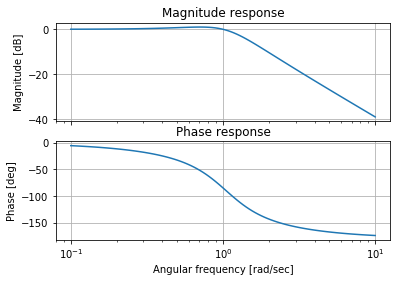

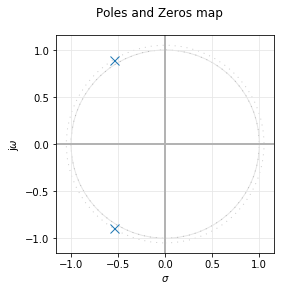

In [47]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

# módulo de SciPy
from scipy import signal as sig


# un módulo adaptado a mis necesidades
from splane import bodePlot, pzmap
        
# Definimos los parámetros de la transferencia:

# O bien en términos de los parámetros w0 y Q

w0 = 1.0501
Q = 0.9565

# Cargamos la funcion transferencia

num = np.array([ w0**2 ])
den = np.array([ 1., w0 / Q, w0**2 ])

######################################################
# O podría ser en mediante los coeficientes del
# numerador y denominador

#num = np.array([ 1. ])
#den = np.array([ 1., 0.5, 1.0 ])

######################################################


H = sig.TransferFunction( num, den )

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.

%matplotlib inline
_, axes_hdl = bodePlot(H)

# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas

plt.sca(axes_hdl[0])
#plt.ylim([-1,1])


plt.gca

pzmap(H)


plt.show()



#### c) Implemente el filtro solicitado mediante la siguiente red y corrobore su funcionamiento respecto a la plantilla de requerimientos.

Implementamos una ganancia de $K = 1$  y  los valores de los componentes $R = C = 1 $, para poder corroborar el funcionamiento de la plantilla. 

A partir de eso despejamos también los valores de los demás componentes: $\frac {R}{K} = 1$,  $Q * R = 0,9565 * 1 = 0.9565$ y por último, $R1 = \frac {1}{w_0 * C} = \frac {1}{1.0501 * 1}  = 0.9523$

Luego, procedemos a simular el circuito en *LTSpice*.

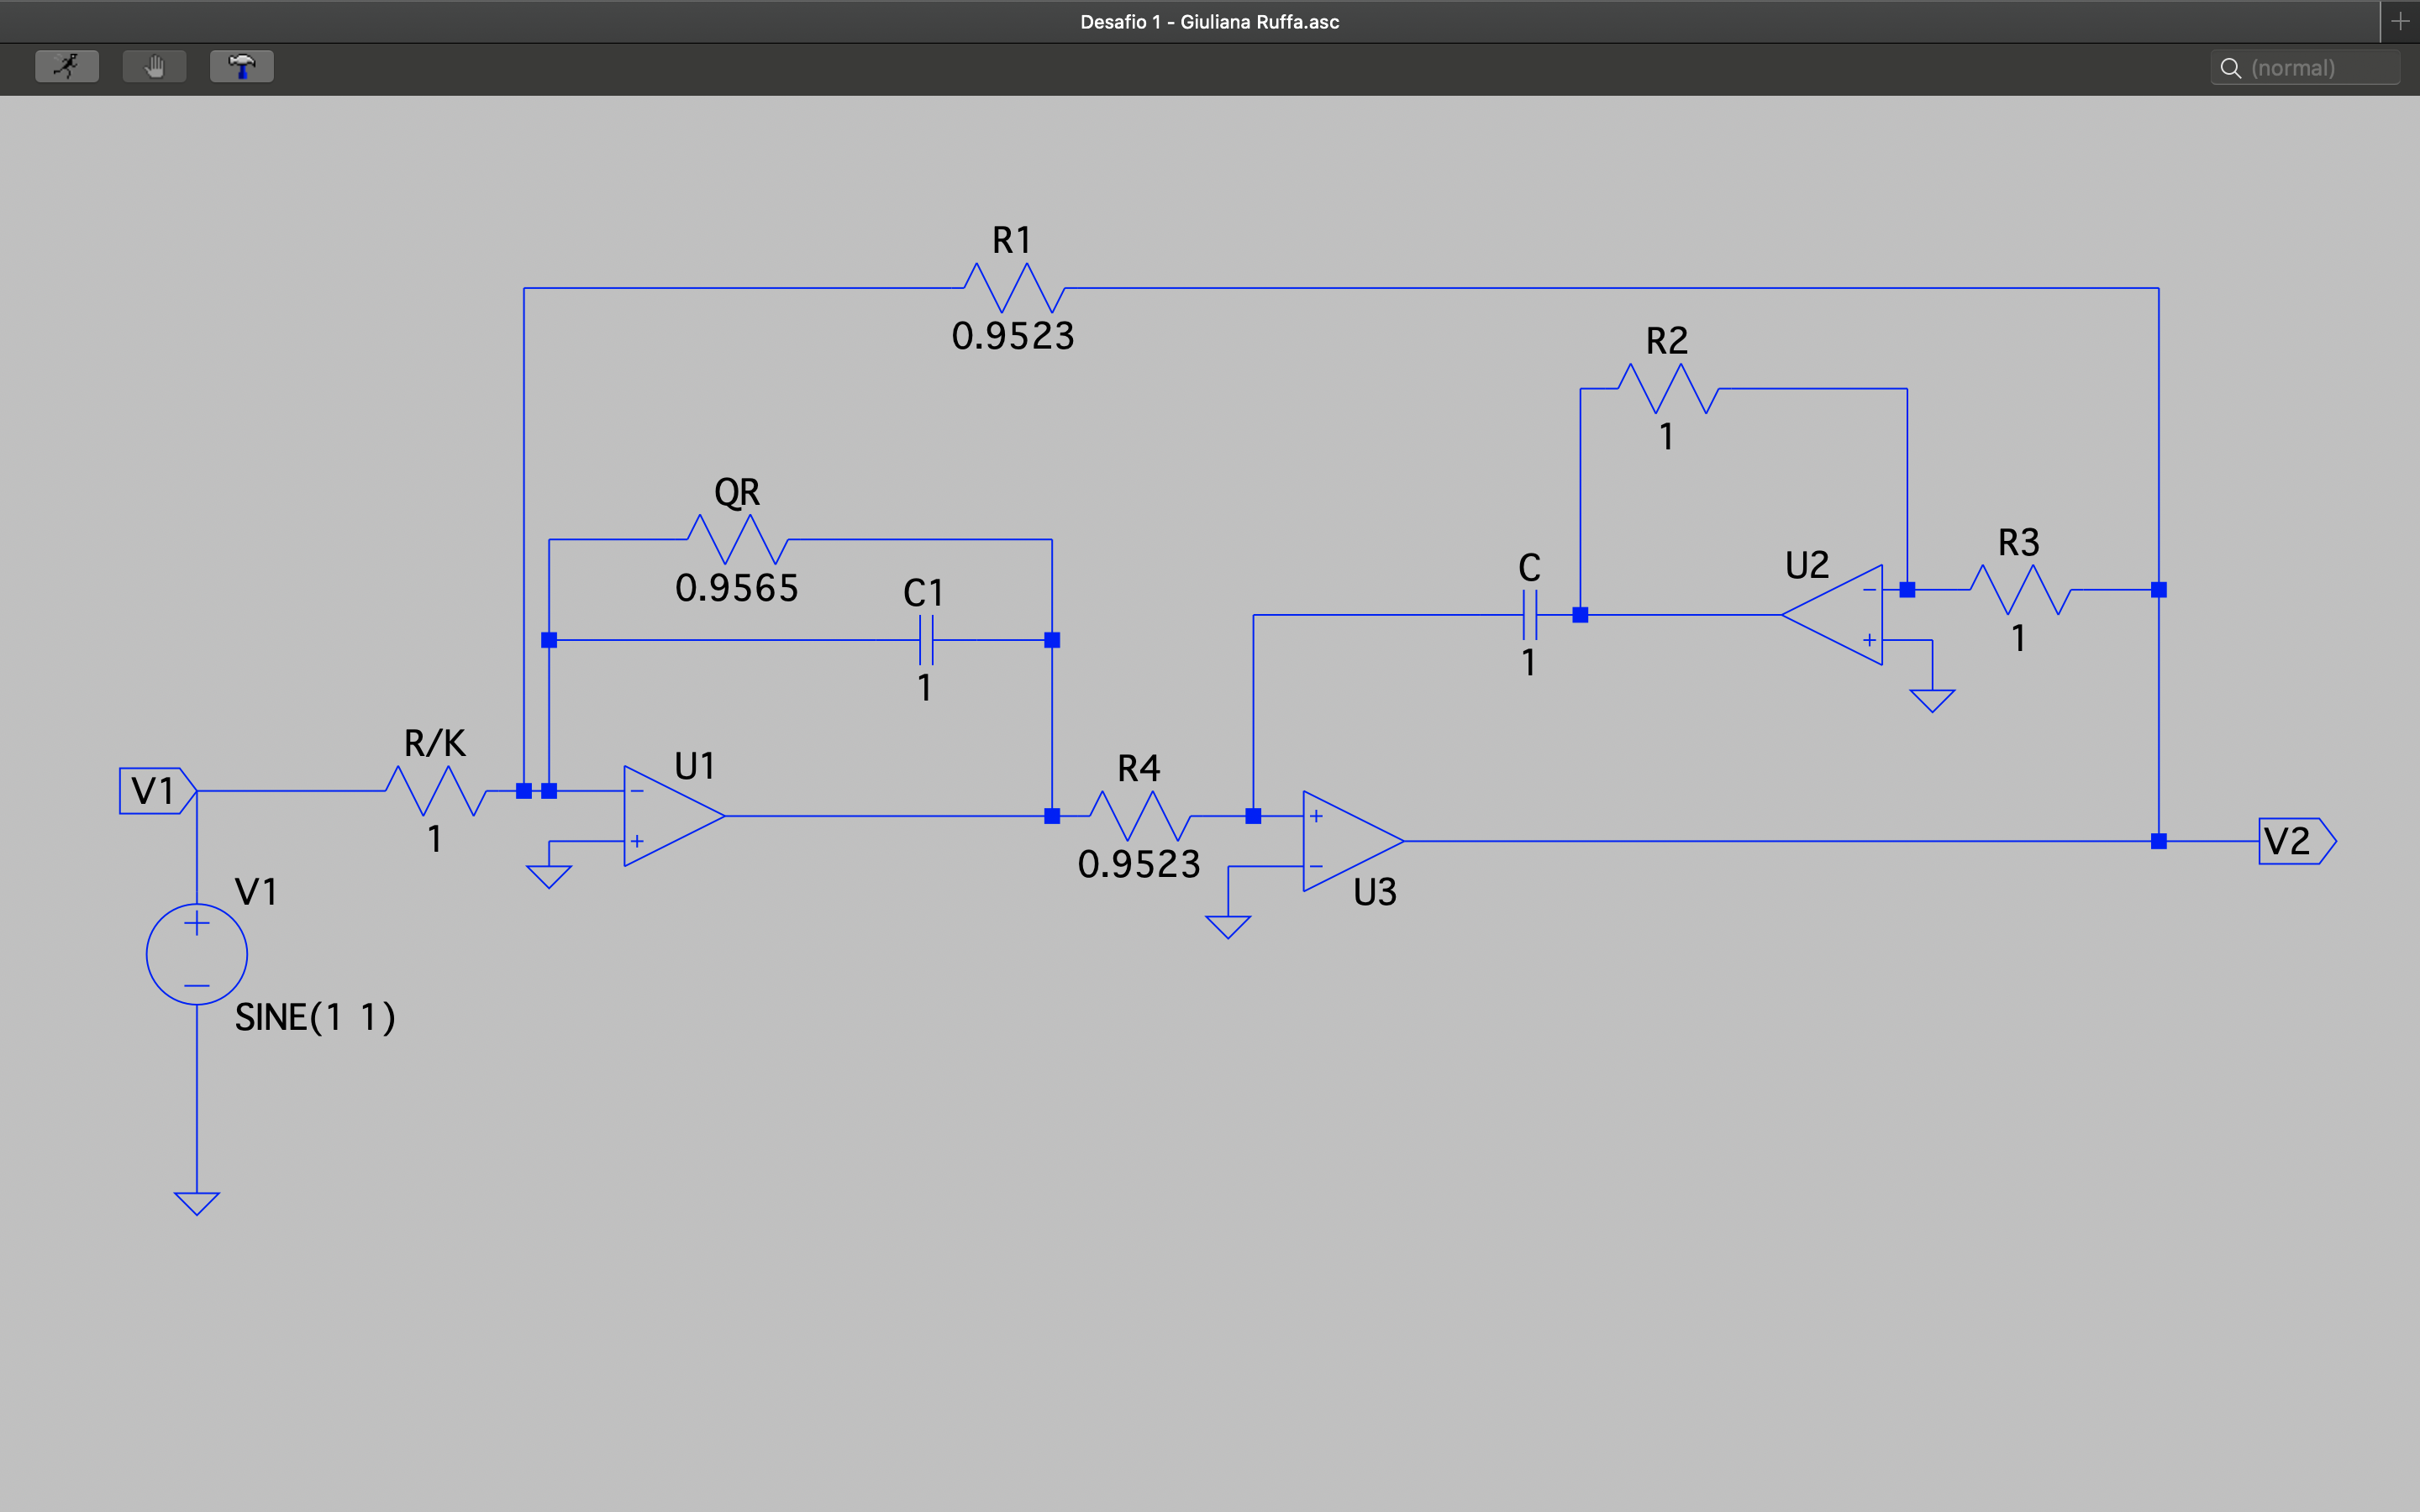